In [35]:
import pandas as pd
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.decomposition
import sklearn.svm
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.cluster import KMeans


In [36]:
pipeline = sklearn.pipeline.Pipeline([
    ['poly', sklearn.preprocessing.PolynomialFeatures(2)],
    ['PCA Dimension Reduction', sklearn.decomposition.PCA(n_components=13)],
    ['Logistic',sklearn.linear_model.LogisticRegression()]
])

In [48]:
df = pd.read_csv('agglutination_12panel_heatmap.csv')
#df = pd.read_csv('agglutination_12panel.csv')
df1 = df.copy()
df1

,cell,A,B,C,D,E,F,G,H,I,J,K,L,P,know
0,positive,4,4,4,4,3,4,3,4,3,4,4,3,4,1
1,positive,4,4,4,4,3,4,4,4,3,4,4,3,4,1
2,positive,4,4,4,4,4,4,4,4,4,4,4,3,4,1
3,negative,0,0,0,0,0,0,0,0,0,0,0,0,0,2
4,negative,0,0,0,0,0,0,0,0,0,0,0,0,0,2
5,negative,0,0,0,0,0,0,0,0,0,0,0,0,0,2
6,DVI,1,4,0,0,0,4,4,4,0,0,0,0,2,6
7,DVI,1,4,0,0,0,4,4,4,0,0,0,0,2,6
8,DVI,1,4,0,0,0,4,4,4,0,0,0,0,2,6
9,DVI,1,3,0,0,0,4,3,4,0,0,0,0,2,6


In [30]:
df_col = df1.drop('cell', axis =1)
df_col1 = df_col.drop('know', axis =1)
df_col1 = df_col1.drop('P', axis =1)


#feature_cols = df_col1.columns.tolist()
feature_cols = ['P','G','F']
print(feature_cols)

xs = df[feature_cols]
x = StandardScaler().fit_transform(xs)

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])
finalDf = pd.concat([principalDf, df['know']], axis = 1)


['P', 'G', 'F']


C:\Users\Arada\Miniconda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Arada\Miniconda\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [38]:
df_col = df1.drop('cell', axis =1)
df_col1 = df_col.drop('know', axis =1)

#feature_cols = df_col1.columns.tolist()
feature_cols = ['A','B','C','D','E','F','G','H','I','J','K','L']
print(feature_cols)

xs = df[feature_cols]
x = StandardScaler().fit_transform(xs)

pca = PCA(n_components=12)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4','principal component 5','principal component 6','principal component 7','principal component 8','principal component 9','principal component 10','principal component 11','principal component 12'])
finalDf = pd.concat([principalDf, df['know']], axis = 1)


['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L']


C:\Users\Arada\Miniconda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Arada\Miniconda\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [32]:
xprincipalDf = principalDf.iloc[:,:12]
xprincipalDf['Cluster'] = k_Cluster
xprincipalDf['Know'] =df['know']
print(feature_cols)
xprincipalDf

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L']


C:\Users\Arada\Miniconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Arada\Miniconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,principal component 11,principal component 12,Cluster,Know
0,-3.407125,0.976023,-0.766217,0.118534,-0.271109,-0.404530,-0.164010,0.208184,-0.059214,-0.021522,1.355803e-16,2.172908e-17,0,0
1,-3.555805,0.680179,-0.754835,0.124258,-0.290430,-0.002466,-0.157670,-0.181264,-0.129328,0.047164,-6.405425e-18,-1.410478e-17,0,0
2,-3.920504,0.910752,-0.740839,-0.438049,-0.084158,0.211299,-0.072509,-0.091296,0.240151,-0.018476,6.458745e-17,3.812150e-18,0,0
3,4.248611,2.390301,0.060660,0.012262,-0.018179,0.014347,-0.033832,-0.014977,0.001021,-0.002212,1.487388e-16,-2.740646e-17,2,1
4,4.248611,2.390301,0.060660,0.012262,-0.018179,0.014347,-0.033832,-0.014977,0.001021,-0.002212,6.985239e-17,3.077495e-18,2,1
5,4.248611,2.390301,0.060660,0.012262,-0.018179,0.014347,-0.033832,-0.014977,0.001021,-0.002212,-2.482886e-17,3.576541e-17,2,1
6,1.609975,-2.117990,-0.384230,-0.100721,0.163356,0.024254,-0.120544,-0.047259,-0.030657,-0.037372,1.291953e-16,-3.347183e-17,1,6
7,1.609975,-2.117990,-0.384230,-0.100721,0.163356,0.024254,-0.120544,-0.047259,-0.030657,-0.037372,2.988588e-17,7.025439e-18,1,6
8,1.609975,-2.117990,-0.384230,-0.100721,0.163356,0.024254,-0.120544,-0.047259,-0.030657,-0.037372,3.468117e-17,3.788284e-17,1,6
9,1.924905,-1.561596,-0.350939,-0.105966,-0.152323,-0.210767,0.293159,0.295344,0.067508,0.020815,-6.405425e-18,-1.410478e-17,1,6


array([0.89169458, 0.10177501, 0.00653041])

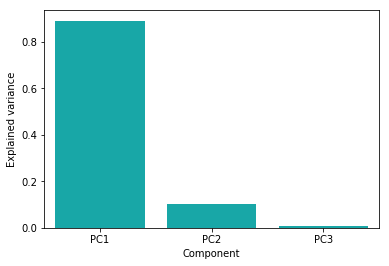

In [28]:
df_2 = pd.DataFrame({'Explained variance':pca.explained_variance_ratio_,
             'Component':['PC1', 'PC2','PC3']})
fig2 =plt.figure()
sns.barplot(x="Component" ,y="Explained variance", data=df_2, color="c");

pca.explained_variance_ratio_

array([7.04931572e-01, 2.22489317e-01, 3.78414655e-02, 1.83539200e-02,
       5.46179372e-03, 5.09783709e-03, 3.81631672e-03, 1.35759980e-03,
       5.28458919e-04, 1.21719197e-04, 5.63967572e-34, 3.16352589e-35])

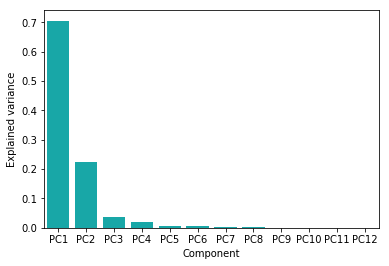

In [9]:
df_2 = pd.DataFrame({'Explained variance':pca.explained_variance_ratio_,
             'Component':['PC1', 'PC2','PC3','PC4', 'PC5','PC6','PC7', 'PC8','PC9','PC10', 'PC11','PC12']})
fig2 =plt.figure()
sns.barplot(x="Component" ,y="Explained variance", data=df_2, color="c");
pca.explained_variance_ratio_

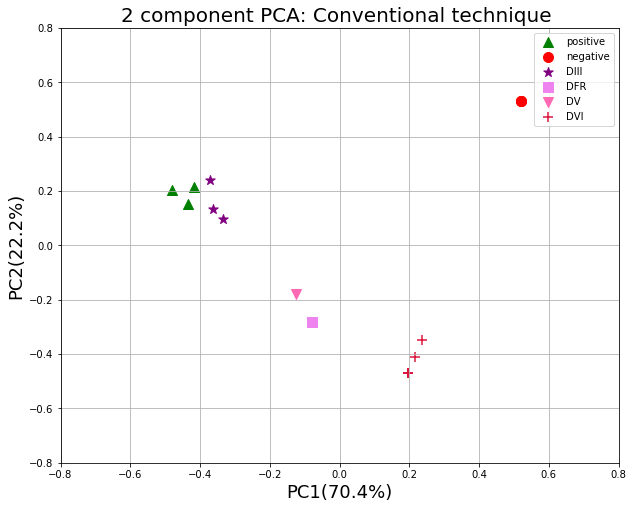

In [25]:
pd.DataFrame(pca.components_, columns=feature_cols).T

fig1 = plt.figure(figsize = (10,8))
    
def myplot(score,coeff,labels=None):
        xs = score[:,0]
        ys = score[:,1]
        z = coeff.shape[0]
        scalex = 1.0/(xs.max() - xs.min())
        scaley = 1.0/(ys.max() - ys.min())
   

        plt.scatter(finalDf.loc[finalDf['know'] == 0, 'principal component 1']* scalex, finalDf.loc[finalDf['know'] == 0, 'principal component 2']* scaley,  s= 100,marker='^',c= 'g',label = 'positive' ) 
        plt.scatter(finalDf.loc[finalDf['know'] == 1, 'principal component 1']* scalex, finalDf.loc[finalDf['know'] == 1, 'principal component 2']* scaley,  s= 100,marker='o',c= 'r',label = 'negative' ) 
        plt.scatter(finalDf.loc[finalDf['know'] == 2 , 'principal component 1']* scalex, finalDf.loc[finalDf['know'] ==  2 , 'principal component 2']* scaley,  s= 100,marker='*',c= 'purple',label = 'DIII' ) 
        plt.scatter(finalDf.loc[finalDf['know'] == 3, 'principal component 1']* scalex, finalDf.loc[finalDf['know'] == 3, 'principal component 2']* scaley,  s= 100,marker='s',c= 'violet',label = 'DFR' ) 
        #plt.scatter(finalDf.loc[finalDf['know'] == 4, 'principal component 1']* scalex, finalDf.loc[finalDf['know'] == 4, 'principal component 2']* scaley,  s= 100,marker='*',c= 'pink',label = 'weakD type1&2' ) 
        plt.scatter(finalDf.loc[finalDf['know'] == 5, 'principal component 1']* scalex, finalDf.loc[finalDf['know'] == 5, 'principal component 2']* scaley,  s= 100,marker='v',c= 'hotpink',label = 'DV' ) 
        plt.scatter(finalDf.loc[finalDf['know'] == 6, 'principal component 1']* scalex, finalDf.loc[finalDf['know'] == 6, 'principal component 2']* scaley,  s= 100,marker='+',c= 'crimson',label = 'DVI' ) 
        #plt.scatter(data_average.iloc[data_average['know']==1, 'principal component 1'] *scalex, data_average.iloc[data_average['know']==1, 'principal component 2']* scaley,  s= 100,marker='+',c= 'crimson',label = 'DVI' ) 
        #plt.scatter(data_average['principal component 1']*scalex ,data_average['principal component 2']*scaley )
        
       # for i, txt in enumerate(df1['cell']):
            #plt.annotate(txt, (finalDf['principal component 1'][i]*scalex,finalDf['principal component 2'][i]* scaley))
       
        labels  =  feature_cols
       # plt.scatter(xs * scalex,ys * scaley)
       # for i in range(z):
         #   plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
           # if labels is None:
             #   plt.text(coeff[i,0], coeff[i,1] , "Var"+str(i+1), color = 'b', ha = 'center', va = 'center')
           # else:
             #   plt.text(coeff[i,0], coeff[i,1] , labels[i], color = 'b', ha = 'center', va = 'center')
     
        plt.legend()
        plt.ylim(-0.8,0.8)
        plt.xlim(-0.8,0.8)
        plt.title('2 component PCA: Conventional technique ', fontsize = 20)
        plt.xlabel("PC1(70.4%)", fontsize = 18)
        plt.ylabel("PC2(22.2%)", fontsize = 18)
        plt.grid()
        
myplot(principalComponents[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()

#fig1.savefig("all_PCA_agg.pdf", bbox_inches='tight')

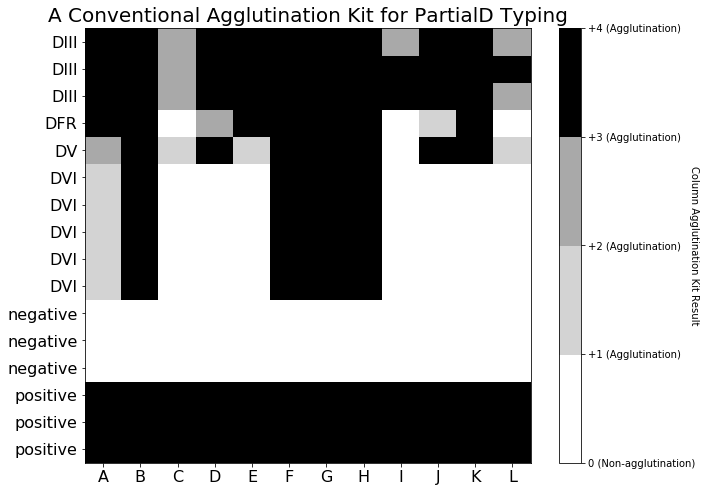

In [33]:
from matplotlib.colors import ListedColormap

Cols = ['A','B','C','D','E','F','G','H','I','J','K','L']

fig,ax = plt.subplots(figsize = (10,8))

heatmap_s = ax.pcolor(df_col1.iloc[:,:], cmap=ListedColormap(['white','lightgray','darkgray','black'  ]))
cbar =  plt.colorbar(heatmap_s, ticks = [0,1,2,3,4])
cbar.ax.set_yticklabels(['0 (Non-agglutination)','+1 (Agglutination)','+2 (Agglutination)','+3 (Agglutination)','+4 (Agglutination)'])
cbar.set_label('Column Agglutination Kit Result', rotation=270)

ax.set_yticks(np.arange(df_col1.iloc[:,:].shape[0]) + 0.5, minor=False)
ax.set_xticks(np.arange(df_col1.iloc[:,:].shape[1]) + 0.5, minor=False)

ax.set_xticklabels(Cols, fontsize =16)
ax.set_yticklabels(df['cell'], fontsize =16)
ax.set_title('A Conventional Agglutination Kit for PartialD Typing', fontsize =20)

fig.savefig("12_panel_agg_pattern.pdf", bbox_inches='tight')

In [21]:
antibody = ['A','B','C','D','E','F','G','H','I','J','K','L','P']
reduced_dimention = [];
reduced_column = [];
p_combination = [];
for k in range(0,13):
    for kk in range(0,13):
        for kkk in range(0,13):
            if k> kk & kk>kkk:
                reduced_dimention.append([antibody[k],antibody[kk],antibody[kkk]])
                s= ""
                As = [antibody[k],'-',antibody[kk],'-',antibody[kkk]]
                p_combination.append(s.join(As))
                reduced_column.append([k,kk,kkk])

In [40]:
def optimal_number_of_clusters(wcss):
    x1, y1 = 1, wcss[0]
    x2, y2 = 10, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+1
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = np.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 1

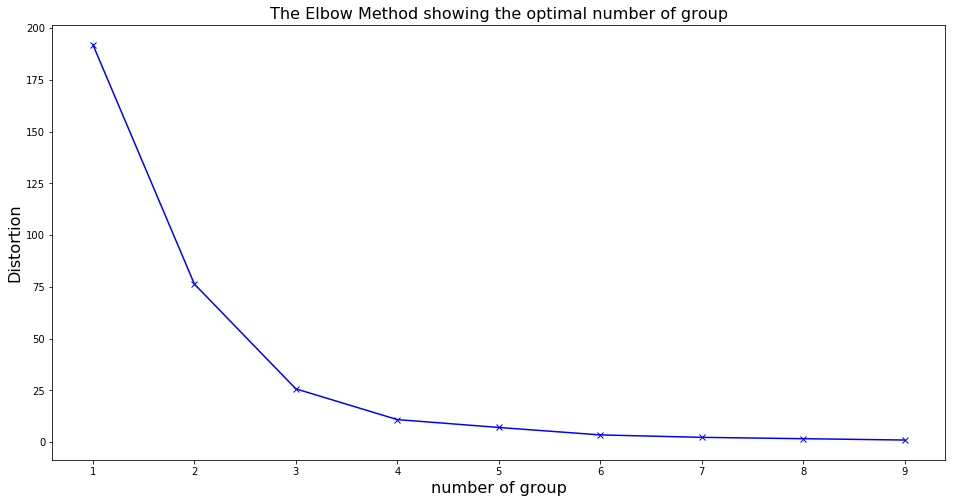

[[ 9.82114739e-01 -1.69335006e+00  9.74247705e-02  7.52761968e-02
  -8.67683068e-03 -2.87289666e-02 -1.81562180e-02  4.59338155e-04
   1.17524853e-02  3.29453169e-03  6.45874484e-17  3.81214977e-18]
 [-3.27010618e+00  7.80424675e-01 -1.43992083e-01 -9.39533921e-02
   1.92127043e-02  2.63435296e-02  3.80982953e-02  6.95255384e-03
  -1.42216833e-02 -2.73768522e-03  6.45874484e-17  3.81214977e-18]
 [ 4.24861129e+00  2.39030079e+00  6.06597016e-02  1.22623250e-02
  -1.81794704e-02  1.43471963e-02 -3.38320818e-02 -1.49768967e-02
   1.02090110e-03 -2.21187018e-03  6.45874484e-17  3.81214977e-18]]


[3]

In [41]:
distortions = []
distortion_ab= []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    k_Cluster = kmeanModel.fit(principalDf.iloc[:,:12])
    distortions.append(kmeanModel.inertia_)
distortion_ab.append(optimal_number_of_clusters(distortions))
    

fig2  = plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('number of group',fontsize =16)
plt.ylabel('Distortion',fontsize =16)
plt.title('The Elbow Method showing the optimal number of group',fontsize =16)
plt.show()

kmeanModel = KMeans(n_clusters=3)
k_Cluster = kmeanModel.fit_predict(principalDf.iloc[:,:12])
print(kmeanModel.cluster_centers_)


#fig2.savefig("all_elbow_agg.pdf", bbox_inches='tight')
distortion_ab

In [28]:
cmap =sns.hls_palette(3, l=.3, s=.8)
fig1 = plt.figure(figsize = (10,8))

xs = principalComponents[:,0]
ys = principalComponents[:,1]
z = np.transpose(pca.components_[0:2, :]).shape[0]
scalex = 1.0/(xs.max() - xs.min())
scaley = 1.0/(ys.max() - ys.min())
   
x_new = principalDf['principal component 1']*scalex.tolist()
y_new =principalDf['principal component 2']*scaley.tolist()
marker = dict({ 1 :'o', 2 :  '.', 3: 'x',4: '+',5: 'v',6: '^'})
labels = []
for x in df1['know'] :
    for l,b in zip(marker.keys(),marker.values()):
        if l == x:
            labels.append(b)
scalex,scaley 

(0.12241227395953667, 0.22181354870659672)

<Figure size 720x576 with 0 Axes>

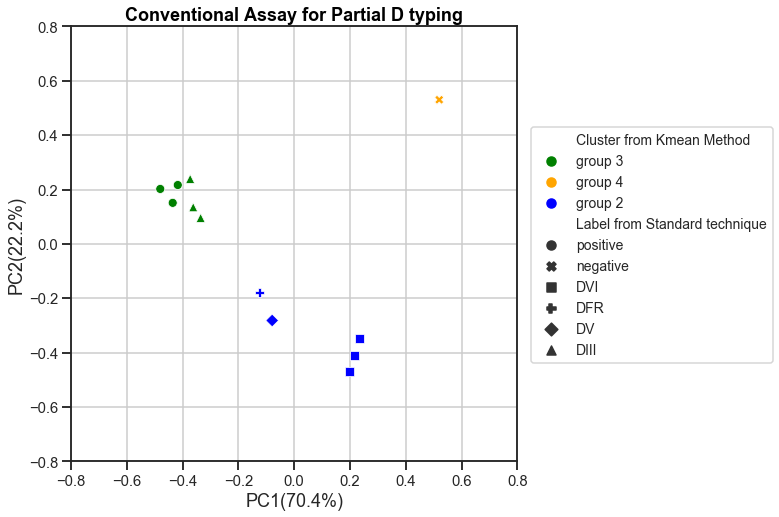

In [59]:


cmap =sns.hls_palette(3, l=.3, s=.8)
fig1 = plt.figure(figsize = (8,8))

xs = principalComponents[:,0]
ys = principalComponents[:,1]
z = np.transpose(pca.components_[0:2, :]).shape[0]
scalex = 1.0/(xs.max() - xs.min())
scaley = 1.0/(ys.max() - ys.min())
   
x_new = principalDf['principal component 1']*scalex.tolist()
y_new =principalDf['principal component 2']*scaley.tolist()
marker = dict({ 1 : 'o', 2 :  '.', 3: 'x',4: '*',5: 'v',6: '^'})
labels = []
#for x in df1['know'] :
  #  for l,b in zip(marker.keys(),marker.values()):
    #    if l == x:
      #      labels.append(b)
scalex,scaley 


df_tem = pd.DataFrame([x_new,y_new,k_Cluster, df1['know']]).T
df_tem.columns = ['X','Y','Cluster from Kmean Method','Label from Standard technique']
df_tem['Label from Standard technique']=df_tem['Label from Standard technique'].map({1:'positive', 2:'negative', 3:'DIII', 4:'DV', 5:'DFR', 6:'DVI'})
df_tem['Cluster from Kmean Method']=df_tem['Cluster from Kmean Method'].map({0:'group 2', 1:'group 3', 2:'group 4', 3:'group 1'})
df_tem
sns.scatterplot(x='X', y='Y', hue = 'Cluster from Kmean Method', style = 'Label from Standard technique', data=df_tem,palette=['green','orange','blue']) 

fontdict={'fontsize': 18,
          'weight' : 'bold',
         'horizontalalignment': 'center'}

sns.set_context('talk', font_scale=0.9)
sns.set_style('ticks')
   #                 palette=['green','orange','brown','blue'], legend='full', size='Season', sizes=[100,100,100,100])
#plt.scatter(principalDf['principal component 1']*scalex, principalDf['principal component 2']*scaley, c = k_Cluster , marker = labels)
#sns.scatterplot(x='X', y = 'Y', data = df, hue = 'Cluster', style= labels, s =100, palette= cmap)
# df_tem
#df_tem


plt.legend(scatterpoints=1,
           bbox_to_anchor=(1, 0.8), loc=2, borderaxespad=1.,
           ncol=1,
           fontsize=14)

plt.title('Conventional Assay for Partial D typing', fontdict=fontdict, color="black",
         position=(0.5,1));
plt.ylim(-0.8,0.8)
plt.xlim(-0.8,0.8)
plt.xlabel("PC1(70.4%)", fontsize = 18)
plt.ylabel("PC2(22.2%)", fontsize = 18)
plt.grid()

fig1.savefig("12_panel_PCA_agg.pdf", bbox_inches='tight')

In [22]:
import numpy as np
from sklearn import metrics
from scipy.optimize import linear_sum_assignment

def cluster_accuracy(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)

    # Find optimal one-to-one mapping between cluster labels and true labels
    row_ind, col_ind = linear_sum_assignment(-contingency_matrix)

    # Return cluster accuracy
    return contingency_matrix[row_ind, col_ind].sum() / np.sum(contingency_matrix)

cluster_accuracy(df['know'], kmeanModel.labels_)

0.6875

In [23]:
distortion_ab = []

for ab in reduced_dimention:
    xs = df[ab]
    x = StandardScaler().fit_transform(xs)
    pca = PCA(n_components=3)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])
    finalDf = pd.concat([principalDf, df['know']], axis = 1)
    distortions = []
    K = range(1,10)
    for k in K:
        kmeanModel = KMeans(n_clusters=k)
        kmeanModel.fit(principalDf)
        distortions.append(kmeanModel.inertia_)
    distortion_ab.append(optimal_number_of_clusters(distortions))
    
distortion_ab

C:\Users\Arada\Miniconda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Arada\Miniconda\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Arada\Miniconda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Arada\Miniconda\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Arada\Miniconda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float

C:\Users\Arada\Miniconda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Arada\Miniconda\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Arada\Miniconda\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\Arada\Miniconda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Arada\Miniconda\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64

C:\Users\Arada\Miniconda\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\Arada\Miniconda\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\Arada\Miniconda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Arada\Miniconda\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Arada\Miniconda\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (8) fo

C:\Users\Arada\Miniconda\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\Arada\Miniconda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Arada\Miniconda\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Arada\Miniconda\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\Arada\Miniconda\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (7) fo

C:\Users\Arada\Miniconda\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\Arada\Miniconda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Arada\Miniconda\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Arada\Miniconda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Arada\Miniconda\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64

C:\Users\Arada\Miniconda\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\Arada\Miniconda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Arada\Miniconda\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Arada\Miniconda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Arada\Miniconda\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64

C:\Users\Arada\Miniconda\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\Arada\Miniconda\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\Arada\Miniconda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Arada\Miniconda\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Arada\Miniconda\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (6) fo

C:\Users\Arada\Miniconda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Arada\Miniconda\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Arada\Miniconda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Arada\Miniconda\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Arada\Miniconda\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_cluster

C:\Users\Arada\Miniconda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Arada\Miniconda\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Arada\Miniconda\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\Arada\Miniconda\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\Arada\Miniconda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 w

C:\Users\Arada\Miniconda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Arada\Miniconda\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Arada\Miniconda\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\Arada\Miniconda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Arada\Miniconda\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64

C:\Users\Arada\Miniconda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Arada\Miniconda\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Arada\Miniconda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Arada\Miniconda\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Arada\Miniconda\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_cluster

C:\Users\Arada\Miniconda\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\Arada\Miniconda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Arada\Miniconda\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Arada\Miniconda\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\Arada\Miniconda\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (8) fo

C:\Users\Arada\Miniconda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Arada\Miniconda\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Arada\Miniconda\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\Arada\Miniconda\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\Arada\Miniconda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 w

C:\Users\Arada\Miniconda\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\Arada\Miniconda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Arada\Miniconda\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Arada\Miniconda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Arada\Miniconda\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64

C:\Users\Arada\Miniconda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Arada\Miniconda\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Arada\Miniconda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Arada\Miniconda\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Arada\Miniconda\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_cluster

C:\Users\Arada\Miniconda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Arada\Miniconda\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Arada\Miniconda\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\Arada\Miniconda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Arada\Miniconda\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64

C:\Users\Arada\Miniconda\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\Arada\Miniconda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Arada\Miniconda\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Arada\Miniconda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Arada\Miniconda\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64

C:\Users\Arada\Miniconda\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\Arada\Miniconda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Arada\Miniconda\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Arada\Miniconda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Arada\Miniconda\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64

C:\Users\Arada\Miniconda\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\Arada\Miniconda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Arada\Miniconda\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Arada\Miniconda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Arada\Miniconda\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64

C:\Users\Arada\Miniconda\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\Arada\Miniconda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Arada\Miniconda\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Arada\Miniconda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Arada\Miniconda\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64

[5,
 4,
 4,
 5,
 4,
 4,
 5,
 4,
 4,
 4,
 4,
 5,
 4,
 4,
 4,
 5,
 4,
 4,
 5,
 4,
 4,
 5,
 4,
 4,
 4,
 5,
 4,
 4,
 5,
 4,
 4,
 3,
 4,
 4,
 4,
 4,
 5,
 4,
 4,
 4,
 5,
 4,
 4,
 5,
 4,
 4,
 3,
 4,
 4,
 4,
 4,
 3,
 4,
 4,
 4,
 3,
 4,
 5,
 5,
 4,
 5,
 5,
 4,
 5,
 5,
 4,
 4,
 4,
 5,
 5,
 5,
 4,
 4,
 5,
 5,
 5,
 4,
 4,
 4,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 4,
 4,
 4,
 4,
 5,
 4,
 4,
 4,
 4,
 4,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 3,
 4,
 4,
 4,
 4,
 4,
 3,
 4,
 4,
 5,
 4,
 4,
 4,
 4,
 5,
 4,
 4,
 4,
 4,
 4,
 5,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 4,
 4,
 5,
 5,
 5,
 3,
 4,
 4,
 4,
 3,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 4,
 4,
 4,
 4,
 5,
 5,
 4,
 4,
 4,
 5,
 4,
 5,
 4,
 4,
 5,
 4,
 5,
 4,
 4,
 4,
 5,
 4,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 4,
 4,
 4,
 4,
 3,
 4,
 5,
 4,
 4,
 4,
 5,
 5,
 5,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 5,
 5,
 5,
 5,
 4,
 5,
 5,
 5,
 4,
 5,
 4,
 5,
 5,
 5,
 4,
 4,
 5,
 5,


In [24]:
def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = np.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2

        Ab  distortions
240  P-G-F            4


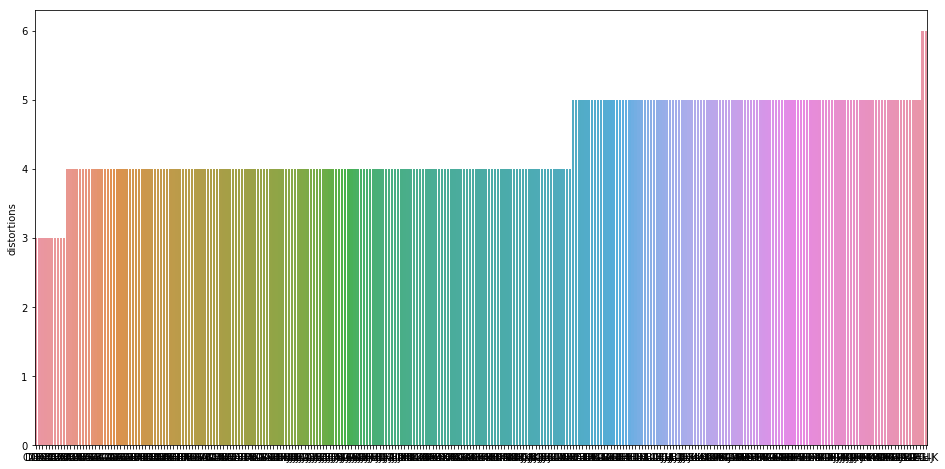

In [27]:
d = {'Ab' : p_combination, 'distortions' : distortion_ab}
distor_df = pd.DataFrame(d)

distor = distor_df.sort_values(by= 'distortions') 

print(distor[distor['Ab'] == 'P-G-F'])

plt.figure(figsize=(16,8))
sns.barplot(p_combination, distor.distortions)

In [ ]:
plt.scatter(principalDf[:,0], principalDf[:,1], c = k_Cluster)

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array 
  alpha: float
  animated: bool
  backgroundcolor: color
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `matplotlib.transforms.Bbox`
  clip_on: bool
  clip_path: { (`.path.Path`, `.transforms.Transform`), `.patches.Patch`, None } 
  color: color
  contains: callable
  figure: `.Figure`
  fontfamily: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontname: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties: `.font_manager.FontProperties`
  fontsize: {size in points, 'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'extra-expanded', 'ultra-expanded'}
  fontstyle: {'normal', 'italic', 'oblique'}
  fontvariant: {'n

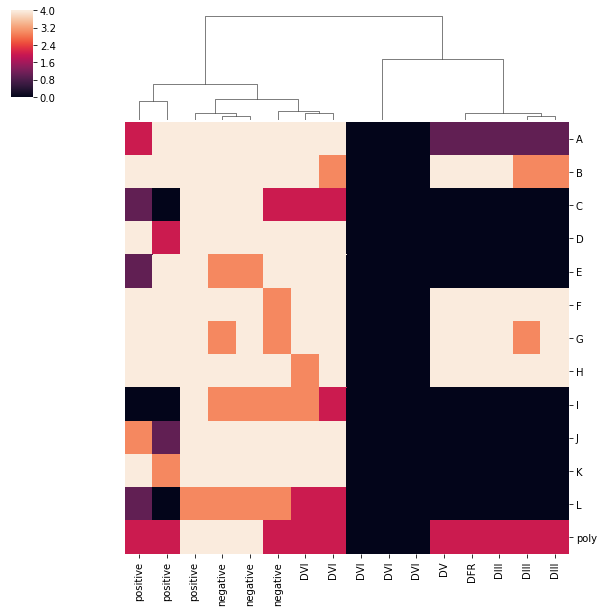

In [26]:
g_panel = sns.clustermap(np.transpose(np.array(df_col1.iloc[:,:]),axes = None), method='ward', metric='euclidean', row_cluster=False,)
plt.setp(g_panel.ax_heatmap.set_yticklabels(Cols, rotation=0))
plt.setp(g_panel.ax_heatmap.set_xticklabels(df['cell'], rotation=90))